<a href="https://colab.research.google.com/github/Skula33/FDSFE_SKulakowski/blob/main/HW2_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# packages used in our hw
import pandas as pd
import missingno as msno
import pylab as pl

# Reading in our Data

In [2]:
happiness_df = pd.read_csv('https://raw.githubusercontent.com/fedhere/FDSfE_FBianco/main/data/happines.csv')

# What is the Shape of our Dataframe?

In [3]:
print("The happiness_df dataframe has dimensions:", format(happiness_df.shape))

The happiness_df dataframe has dimensions: (160, 12)


# First Looks of our Data

In [4]:
happiness_df.head(10)

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
5,Finland,Western Europe,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,2015
6,Netherlands,Western Europe,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,2015
7,Sweden,Western Europe,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,2015
8,New Zealand,Australia and New Zealand,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,2015
9,Australia,Australia and New Zealand,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015


In [5]:
happiness_df.tail(10)

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
150,Ivory Coast,Sub-Saharan Africa,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723,2015
151,Burkina Faso,Sub-Saharan Africa,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494,2015
152,Afghanistan,Southern Asia,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,2015
153,Rwanda,Sub-Saharan Africa,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015
154,Benin,Sub-Saharan Africa,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2015
155,Syria,Middle East and Northern Africa,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015
156,Burundi,Sub-Saharan Africa,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015
157,Togo,Sub-Saharan Africa,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726,2015
158,Namibia,NaN,4.639,NaN,0.87900,NaN,0.47700,0.40100,0.05600,0.07000,NaN,2019
159,Gambia,NaN,4.516,NaN,0.30800,NaN,0.42800,0.38200,0.16700,0.26900,NaN,2019


# Initial Analysis of our Numeric Columns

In [6]:
happiness_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Happiness Score,160.0,5.365756,1.141280,2.83900,4.517750,5.203000,6.193250,7.58700
Standard Error,158.0,0.047885,0.017146,0.01848,0.037268,0.043940,0.052300,0.13693
Economy (GDP per Capita),160.0,0.842979,0.402840,0.00000,0.539453,0.901085,1.155523,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health (Life Expectancy),160.0,0.628037,0.246332,0.00000,0.437897,0.695745,0.809837,1.02525
Freedom,160.0,0.428151,0.149803,0.00000,0.328630,0.434635,0.547057,0.66973
Trust (Government Corruption),160.0,0.143023,0.119492,0.00000,0.061067,0.107220,0.179565,0.55191
Generosity,160.0,0.236448,0.126605,0.00000,0.148800,0.216130,0.307547,0.79588
Dystopia Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214
year,160.0,2015.050000,0.445805,2015.00000,2015.000000,2015.000000,2015.000000,2019.00000


# Missing Values: Cleaning Data

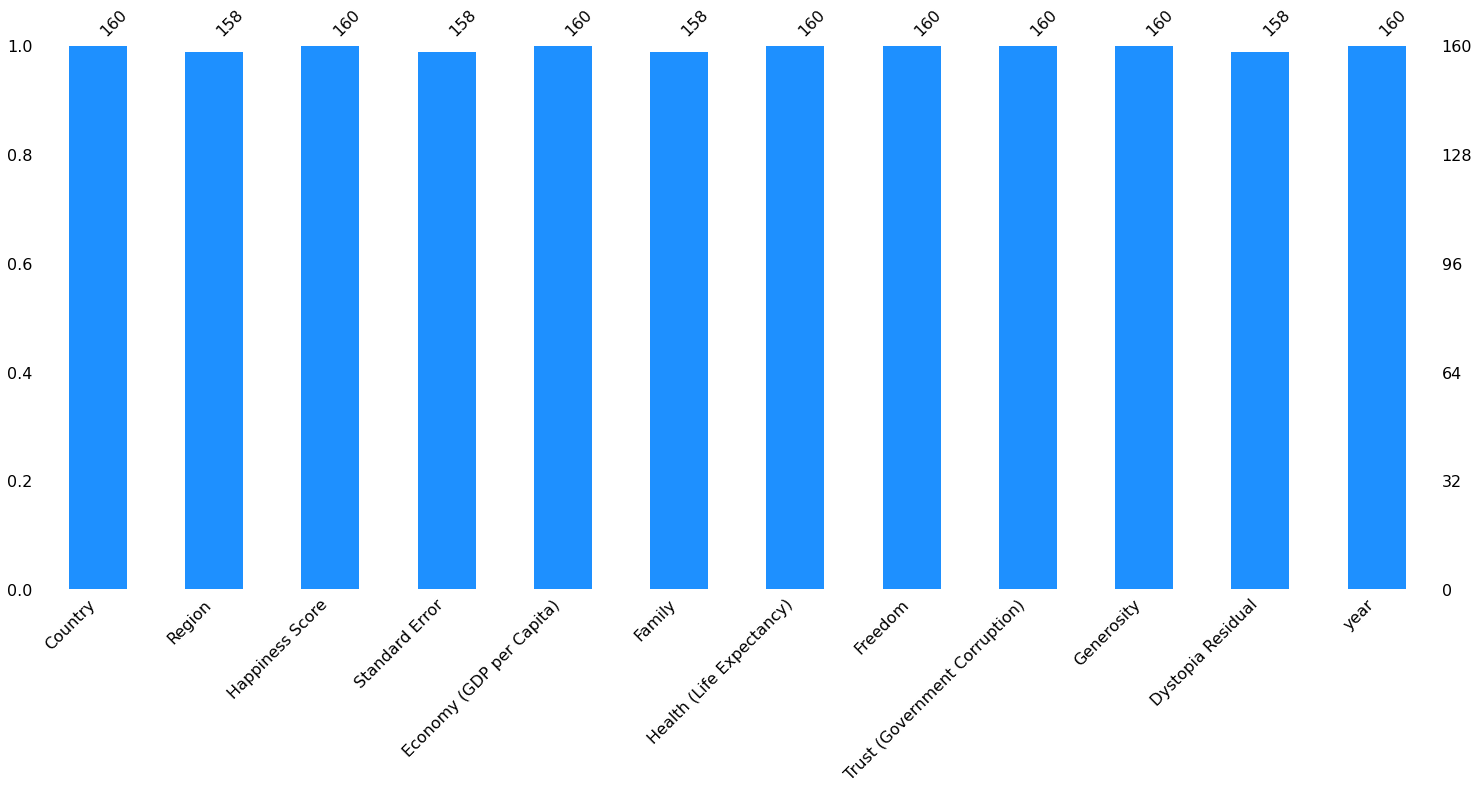

In [7]:
msno.bar(happiness_df, color = 'dodgerblue');

We can see that we don't have more than 2 values missing in any of our columns, we can omit these values in our dataframe.

In [8]:
happiness_df_cleaned = happiness_df.dropna()

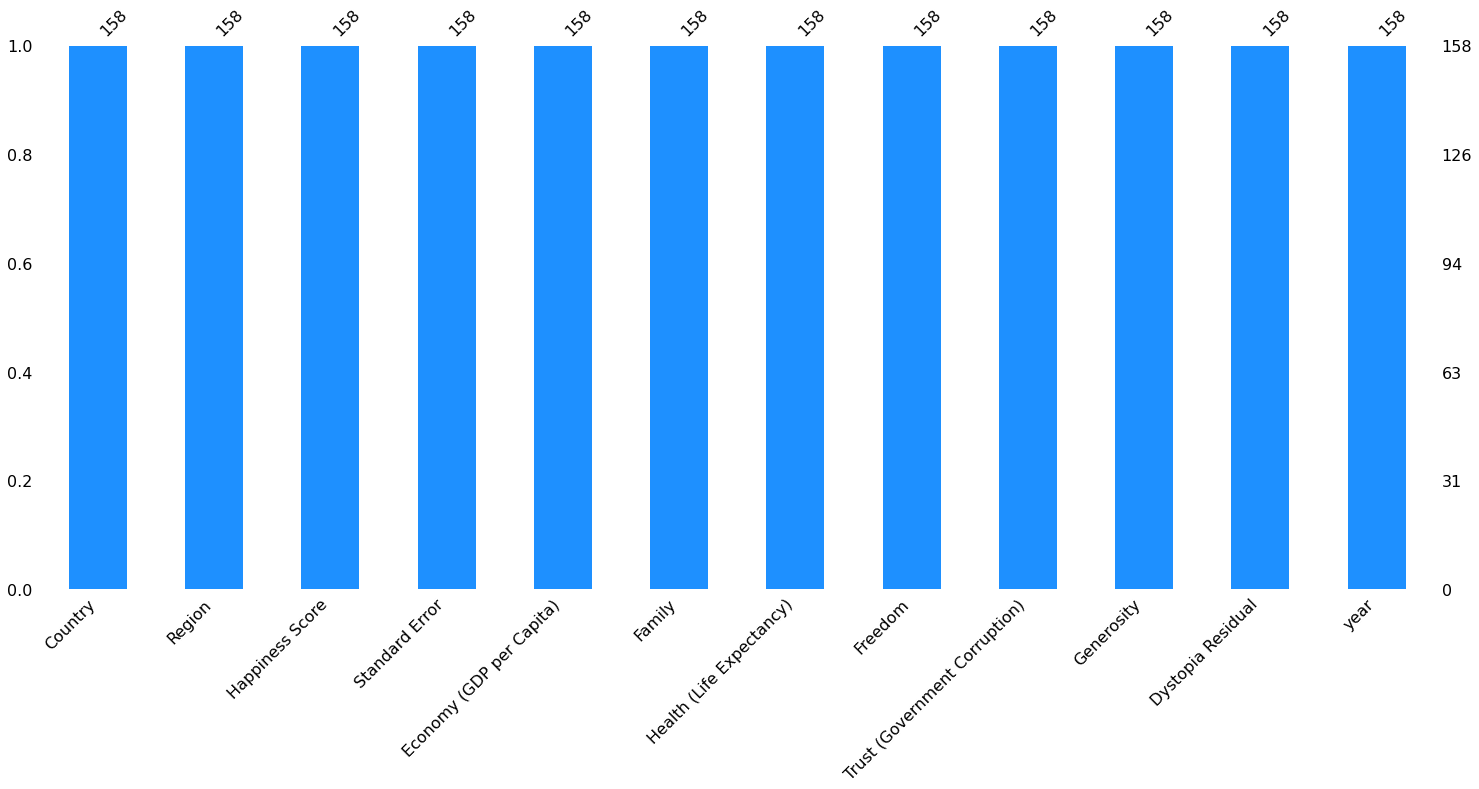

In [9]:
msno.bar(happiness_df_cleaned, color = 'dodgerblue');

# Who Is the Happiest??

In [10]:
happy_place = happiness_df_cleaned[happiness_df_cleaned['Happiness Score'] == happiness_df_cleaned['Happiness Score'].max()]

print("The happiest country in this dataset is {}".format(happy_place.Country.values[0]))

The happiest country in this dataset is Switzerland


In [11]:
# What else is Switzerland??
vars = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

for i in vars:
  maxes = []
  max = happiness_df_cleaned[happiness_df_cleaned[i] == happiness_df_cleaned[i].max()]
  print(i, ":", max.Country.values[0])

Economy (GDP per Capita) : Qatar
Family : Iceland
Health (Life Expectancy) : Singapore
Freedom : Norway
Trust (Government Corruption) : Rwanda
Generosity : Myanmar
Dystopia Residual : Mexico


We can see that Switzerland is NOT numerically represented to be the best at `Economy (GDP per Capita)`, `Family`, `Health (Life Expectancy)`, `Freedom`, `Trust (Government Corruption)`, `Generosity`, and `Dystopia Residual`.

# How Happy are We??

In [12]:
US_Stat = happiness_df_cleaned[happiness_df_cleaned['Country'] == 'United States']
US_Stat

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
14,United States,North America,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.1589,0.40105,2.51011,2015


In [13]:
# Happiest Countries

Happy_placeS = happiness_df_cleaned.sort_values('Happiness Score', ascending = False)
Happy_placeS.head(10)

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
5,Finland,Western Europe,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,2015
6,Netherlands,Western Europe,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,2015
7,Sweden,Western Europe,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,2015
8,New Zealand,Australia and New Zealand,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,2015
9,Australia,Australia and New Zealand,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,2015


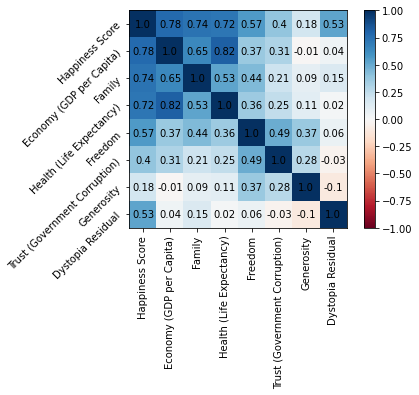

In [14]:
happiness_corr = happiness_df_cleaned[['Happiness Score','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']].corr()

pl.imshow(happiness_corr, clim = (-1,1), cmap = "RdBu");
pl.xticks([0, 1, 2, 3, 4, 5, 6, 7], ['Happiness Score','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
          rotation = 90)
pl.yticks([0, 1, 2, 3, 4, 5, 6, 7], ['Happiness Score','Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'],
          rotation = 45)
for i in range(len(happiness_corr.columns)):
    for j in range(len(happiness_corr.columns)):
        text = pl.text(j, i, round(happiness_corr.to_numpy()[i, j], 2),
                       ha="center", va="center", color="black")
pl.colorbar();

We can see that Happiness Score is highly correlated with Economy, Family, and Health with Freedom and dystopia residual being moderately correlated. We can also see that Health and Economy are highly correlated with Family and Economy also being moderately correlated. There are also other moderately correlated columns, but nothing too significant to consider.

# Highest Generosities by Region

In [15]:
Generosity_sums = happiness_df_cleaned.groupby('Region')['Generosity'].sum()
Generosity_sums.head(10)

Region
Australia and New Zealand          0.91063
Central and Eastern Europe         4.41565
Eastern Asia                       1.35531
Latin America and Caribbean        4.79133
Middle East and Northern Africa    3.80751
North America                      0.85916
Southeastern Asia                  3.77335
Southern Asia                      2.39000
Sub-Saharan Africa                 8.84547
Western Europe                     6.34428
Name: Generosity, dtype: float64

We could query this series to find the highest value for summated generosity scores for each region, but I like the relative comparisions that this output provides. We can clearly see that `Sub-Saharan Africa` has the highest summated generosity score at **8.84547**, with `Western Europe` in a close second at **6.34428**.